# Read data from hdf5

This notebook shows how to open and read the hackathon data stored in the HDF5 data file format.

The HDF5 format is handled by the h5py Python package.

Each HDF5 file in the Hackathon corpus contains three datasets.
Each dataset is accessed using a keyword. In our case the keywords are:

- *id*: id assigned to every block
- *img*: array representation of a block, pixels are binary
- *shape*: dimensions (height,width) of a block notice that blocks vary in shape, so this info is important

Each dataset is an indexed list of entries. The same index corresponds to the same block in all three datasets, so that
id[0] is the id corresponding to the image contained in img[0] which has to be reshaped to shape[0] before processing.

In [2]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

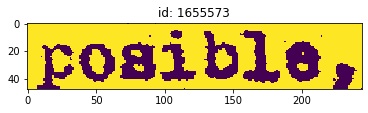

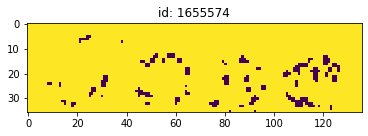

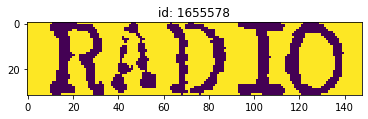

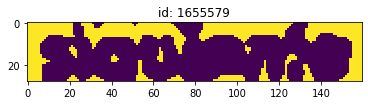

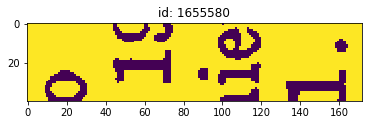

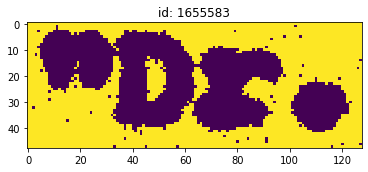

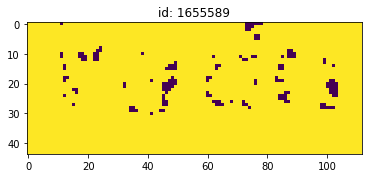

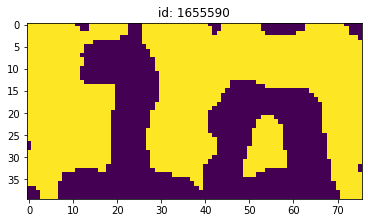

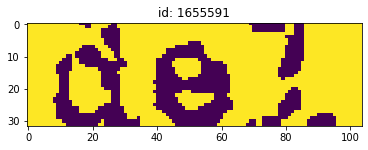

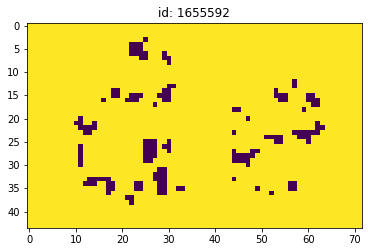

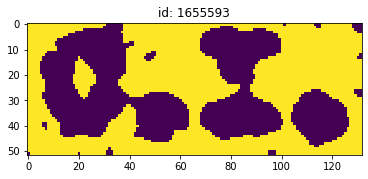

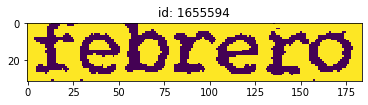

In [13]:
with h5py.File('./example.h5') as f:
    ids = f['id']
    imgs = f['img']
    shapes = f['shape']
    for i in range(ids.shape[0]):
        shape = shapes[i]
        block_len = int(shape[0]) * int(shape[1])  # number of pixels
        block_bits = imgs[i]            # get packed bits
        block_pixels = np.unpackbits(block_bits)         # unpack bits into boolean pixels
        block_pixels = block_pixels[:block_len]          # discard trailing bits generate during packing
        block_array = np.reshape(block_pixels, shape)
        plt.imshow(block_array)
        plt.title(f'id: {ids[i]}')
        plt.show()